In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [25]:
#Loading the datasets
ac= pd.read_excel("Accidents0515.xlsx")
cs = pd.read_excel('Casualties0515.xlsx')
vs= pd.read_excel("Vehicles0515.xlsx")

In [26]:
#Clean each dataframe and remain with the features that you want to use

"""Dealing with the ac variable which contains accident data"""

#Dropping some cells that wont be used
ac1=ac.drop(['1st_Road_Class','Police_Force','Local_Authority_(District)','Local_Authority_(Highway)','Junction_Control','Did_Police_Officer_Attend_Scene_of_Accident','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Carriageway_Hazards','LSOA_of_Accident_Location'],axis='columns',inplace=False)

# check if there exist nan values
print(ac1.isna().values.any())
#showing the number of missing values
print(ac1.isna().sum())

# Converting the Accident_Severity to be 0- slight and serious and 1-fatal
ac1['Accident_Severity'].replace(2,0,inplace=True)
ac1['Accident_Severity'].replace(3,0,inplace=True)

True
Accident_Index              0
Location_Easting_OSGR      31
Location_Northing_OSGR     31
Longitude                  31
Latitude                   31
Accident_Severity           0
Number_of_Vehicles          0
Number_of_Casualties        0
Date                        0
Day_of_Week                 0
Time                        1
Road_Type                   0
Speed_limit                 0
Junction_Detail             0
Light_Conditions            0
Weather_Conditions          0
Road_Surface_Conditions     0
Urban_or_Rural_Area         0
dtype: int64


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [27]:
"""Dealing with the cs variable which contains all value about casualties"""

#Dropping some cells that wont be used
cs1=cs.drop(['Pedestrian_Movement','Vehicle_Reference','Casualty_Reference','Sex_of_Casualty','Age_of_Casualty','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Type','Casualty_Home_Area_Type'],axis='columns',inplace=False)

# check if there exist nan values
print(cs1.isna().values.any())
print(cs1.isna().sum())

#dropping the Accident_Index in cs dataframe
cs2=cs1.drop(['Accident_Index'],axis='columns',inplace=False)


# Converting the Casualty_Severity to be 0- slight and serious and 1-fatal
cs2['Casualty_Severity'].replace(2,0,inplace=True)
cs2['Casualty_Severity'].replace(3,0,inplace=True)

False
Accident_Index          0
Casualty_Class          0
Age_Band_of_Casualty    0
Casualty_Severity       0
Pedestrian_Location     0
dtype: int64


In [28]:
"""Dealing with the vs variable which contains all value about Vehicles"""

#Dropping some cells that wont be used
vs1=vs.drop(['Vehicle_Reference','Towing_and_Articulation','Junction_Location','Vehicle_Leaving_Carriageway','Hit_Object_off_Carriageway','Was_Vehicle_Left_Hand_Drive?','Age_of_Driver','Vehicle_Location-Restricted_Lane','Age_Band_of_Driver','Engine_Capacity_(CC)','Propulsion_Code','Driver_IMD_Decile','Driver_Home_Area_Type'],axis='columns',inplace=False)
# check if there exist nan values
print(vs1.isna().values.any())
print(vs1.isna().sum())

#dropping the Accident_Index in vs dataframe
vs2=vs1.drop(['Accident_Index'],axis='columns',inplace=False)

False
Accident_Index               0
Vehicle_Type                 0
Vehicle_Manoeuvre            0
Skidding_and_Overturning     0
Hit_Object_in_Carriageway    0
1st_Point_of_Impact          0
Journey_Purpose_of_Driver    0
Sex_of_Driver                0
Age_of_Vehicle               0
dtype: int64


In [37]:
#concatenating the dataframes from all the 3 dataframes
#concatenate the dataframe now to join ac and cs (which lacks the accident_index because they would clash with that of ac)
all_data=pd.concat([ac1,cs2,vs2],axis='columns')

#drop rows with missing value and check if there are any missing values afterwards
all_data_1=all_data.dropna()


In [38]:
print(all_data_1.isna().values.any())

False


In [39]:
print(all_data_1.isna().sum())

Accident_Index               0
Location_Easting_OSGR        0
Location_Northing_OSGR       0
Longitude                    0
Latitude                     0
Accident_Severity            0
Number_of_Vehicles           0
Number_of_Casualties         0
Date                         0
Day_of_Week                  0
Time                         0
Road_Type                    0
Speed_limit                  0
Junction_Detail              0
Light_Conditions             0
Weather_Conditions           0
Road_Surface_Conditions      0
Urban_or_Rural_Area          0
Casualty_Class               0
Age_Band_of_Casualty         0
Casualty_Severity            0
Pedestrian_Location          0
Vehicle_Type                 0
Vehicle_Manoeuvre            0
Skidding_and_Overturning     0
Hit_Object_in_Carriageway    0
1st_Point_of_Impact          0
Journey_Purpose_of_Driver    0
Sex_of_Driver                0
Age_of_Vehicle               0
dtype: int64


In [40]:
all_data_1.count()

Accident_Index               99967
Location_Easting_OSGR        99967
Location_Northing_OSGR       99967
Longitude                    99967
Latitude                     99967
Accident_Severity            99967
Number_of_Vehicles           99967
Number_of_Casualties         99967
Date                         99967
Day_of_Week                  99967
Time                         99967
Road_Type                    99967
Speed_limit                  99967
Junction_Detail              99967
Light_Conditions             99967
Weather_Conditions           99967
Road_Surface_Conditions      99967
Urban_or_Rural_Area          99967
Casualty_Class               99967
Age_Band_of_Casualty         99967
Casualty_Severity            99967
Pedestrian_Location          99967
Vehicle_Type                 99967
Vehicle_Manoeuvre            99967
Skidding_and_Overturning     99967
Hit_Object_in_Carriageway    99967
1st_Point_of_Impact          99967
Journey_Purpose_of_Driver    99967
Sex_of_Driver       

In [43]:
all_data_1.set_index('Accident_Index',inplace=True)

In [44]:
all_data_1.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Casualty_Severity,Pedestrian_Location,Vehicle_Type,Vehicle_Manoeuvre,Skidding_and_Overturning,Hit_Object_in_Carriageway,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Vehicle
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,0,1,1,2005-01-04,3,17:42:00,...,0,1,9,18,0,0,1,15,2,-1
200501BS00002,524170.0,181650.0,-0.211708,51.520075,0,1,1,2005-01-05,4,17:36:00,...,0,0,11,4,0,0,4,1,1,3
200501BS00003,524520.0,182240.0,-0.206458,51.525301,0,2,1,2005-01-06,5,00:15:00,...,0,0,11,17,0,4,4,1,1,5
200501BS00004,526900.0,177530.0,-0.173862,51.482442,0,1,1,2005-01-07,6,10:35:00,...,0,5,9,2,0,0,3,15,1,6
200501BS00005,528060.0,179040.0,-0.156618,51.495752,0,1,1,2005-01-10,2,21:13:00,...,0,0,9,18,0,0,1,15,2,4


In [54]:
print (all_data_1.dtypes)

Location_Easting_OSGR               float64
Location_Northing_OSGR              float64
Longitude                           float64
Latitude                            float64
Accident_Severity                     int64
Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Date                         datetime64[ns]
Day_of_Week                           int64
Time                                 object
Road_Type                             int64
Speed_limit                           int64
Junction_Detail                       int64
Light_Conditions                      int64
Weather_Conditions                    int64
Road_Surface_Conditions               int64
Urban_or_Rural_Area                   int64
Casualty_Class                        int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Vehicle_Type                          int64
Vehicle_Manoeuvre               

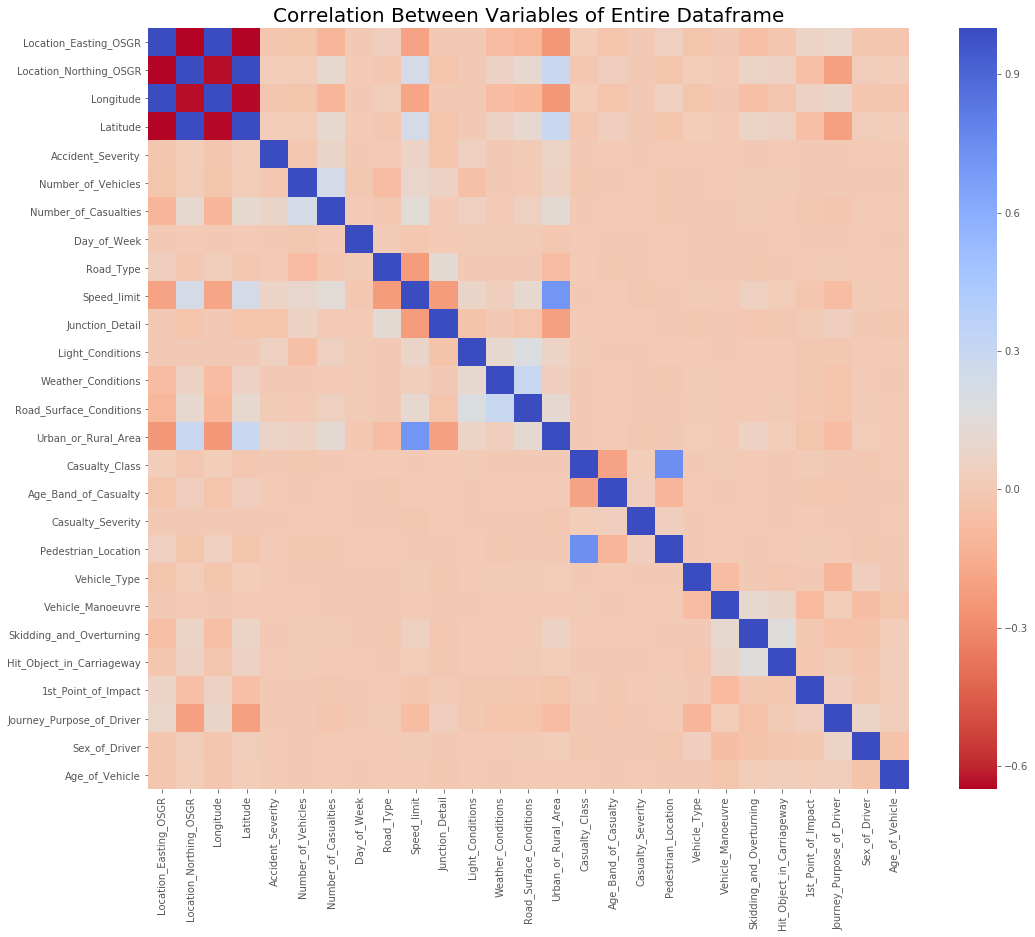

In [122]:
# Entire DataFrame correlation

corr = all_data_1.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm_r',square=True)
plt.title("Correlation Between Variables of Entire Dataframe", fontsize=20)
plt.show()


In [128]:
#dropping other columns that are closely correlated and those that arent useful
all_data_2=all_data_1.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Number_of_Vehicles','Date','Day_of_Week','Time','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Casualty_Class','Vehicle_Type','Hit_Object_in_Carriageway','Journey_Purpose_of_Driver','Age_of_Vehicle'],axis='columns',inplace=False)
all_data_2.head()

,Accident_Severity,Number_of_Casualties,Road_Type,Road_Surface_Conditions,Urban_or_Rural_Area,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Vehicle_Manoeuvre,Skidding_and_Overturning,1st_Point_of_Impact,Sex_of_Driver
Accident_Index,,,,,,,,,,,,
200501BS00001,0,1,6,2,1,7,0,1,18,0,1,2
200501BS00002,0,1,3,1,1,7,0,0,4,0,4,1
200501BS00003,0,1,6,1,1,9,0,0,17,0,4,1
200501BS00004,0,1,6,1,1,6,0,5,2,0,3,1
200501BS00005,0,1,6,2,1,8,0,0,18,0,1,2


In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier LiAbraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'imblearn'

In [133]:
# to see how much the casualty severity is skewed
print('Survived Accident', round(all_data_2['Casualty_Severity'].value_counts()[0]/len(all_data_2) * 100,2), '% from the dataset')
print('Died from Accident', round(all_data_2['Casualty_Severity'].value_counts()[1]/len(all_data_2) * 100,2), '% from the dataset')

Survived Accident 99.07 % from the dataset
Died from Accident 0.93 % from the dataset


Text(0.5, 1.0, 'Casualty_Severity Distributions')

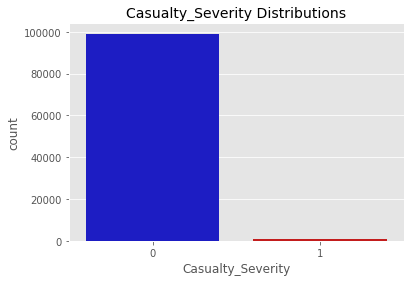

In [130]:
#a graph showing the caulty severity
colors = ["#0101DF", "#DF0101"]

sns.countplot('Casualty_Severity', data=all_data_2, palette=colors)
plt.title('Casualty_Severity Distributions', fontsize=14)


In [142]:
#Scaling
#rob scalers is less prone to outliers
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
all_data_2['Accident_Severity'] = rob_scaler.fit_transform(all_data_2['Accident_Severity'].values.reshape(-1,1))
all_data_2['Number_of_Casualties'] = rob_scaler.fit_transform(all_data_2['Number_of_Casualties'].values.reshape(-1,1))
all_data_2['Road_Type'] = rob_scaler.fit_transform(all_data_2['Road_Type'].values.reshape(-1,1))
all_data_2['Road_Surface_Conditions'] = rob_scaler.fit_transform(all_data_2['Road_Surface_Conditions'].values.reshape(-1,1))
all_data_2['Urban_or_Rural_Area'] = rob_scaler.fit_transform(all_data_2['Urban_or_Rural_Area'].values.reshape(-1,1))
all_data_2['Age_Band_of_Casualty'] = rob_scaler.fit_transform(all_data_2['Age_Band_of_Casualty'].values.reshape(-1,1))
all_data_2['Pedestrian_Location'] = rob_scaler.fit_transform(all_data_2['Pedestrian_Location'].values.reshape(-1,1))
all_data_2['Vehicle_Manoeuvre'] = rob_scaler.fit_transform(all_data_2['Vehicle_Manoeuvre'].values.reshape(-1,1))
all_data_2['Skidding_and_Overturning'] = rob_scaler.fit_transform(all_data_2['Skidding_and_Overturning'].values.reshape(-1,1))
all_data_2['1st_Point_of_Impact'] = rob_scaler.fit_transform(all_data_2['1st_Point_of_Impact'].values.reshape(-1,1))
all_data_2['Sex_of_Driver'] = rob_scaler.fit_transform(all_data_2['Sex_of_Driver'].values.reshape(-1,1))

In [144]:
all_data_2.head()


,Accident_Severity,Number_of_Casualties,Road_Type,Road_Surface_Conditions,Urban_or_Rural_Area,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Vehicle_Manoeuvre,Skidding_and_Overturning,1st_Point_of_Impact,Sex_of_Driver
Accident_Index,,,,,,,,,,,,
200501BS00001,0.0,0.0,0.0,1.0,0.0,0.333333,0,1.0,0.090909,0.0,0.0,1.0
200501BS00002,0.0,0.0,-3.0,0.0,0.0,0.333333,0,0.0,-1.181818,0.0,1.5,0.0
200501BS00003,0.0,0.0,0.0,0.0,0.0,1.000000,0,0.0,0.000000,0.0,1.5,0.0
200501BS00004,0.0,0.0,0.0,0.0,0.0,0.000000,0,5.0,-1.363636,0.0,1.0,0.0
200501BS00005,0.0,0.0,0.0,1.0,0.0,0.666667,0,0.0,0.090909,0.0,0.0,1.0


In [146]:
all_data_2.describe()

,Accident_Severity,Number_of_Casualties,Road_Type,Road_Surface_Conditions,Urban_or_Rural_Area,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Vehicle_Manoeuvre,Skidding_and_Overturning,1st_Point_of_Impact,Sex_of_Driver
count,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000,99967.000000
mean,0.012364,0.357158,-0.808777,0.324107,0.236058,-0.054531,0.009263,0.778567,-0.387861,0.131563,0.386863,0.364440
std,0.110505,0.803953,1.606457,0.565224,0.424778,0.815111,0.095798,2.076538,0.560207,0.554997,0.599326,0.586331
min,0.000000,0.000000,-5.000000,-2.000000,0.000000,-2.333333,0.000000,0.000000,-1.636364,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667,0.000000,0.000000,-0.909091,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.090909,0.000000,1.000000,1.000000
max,1.000000,22.000000,3.000000,4.000000,2.000000,1.666667,1.000000,10.000000,0.090909,5.000000,1.500000,2.000000


In [147]:
#splitting the data into test and training data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold